In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
try:
    loan_dataset = pd.read_csv('loan_data.csv')
except FileNotFoundError:
    print("Error: 'loan_data.csv' not found. Please provide the correct file path.")
    exit()

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and columns
loan_dataset.shape

(381, 13)

In [6]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [8]:
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}}, inplace=True)
loan_dataset['Loan_Status'] = loan_dataset['Loan_Status'].astype('int64') # Or .astype('category')

C:\Users\Lenovo!\AppData\Local\Temp\ipykernel_19172\3065419869.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}}, inplace=True)


In [9]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1


In [10]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

Dependents
0     194
2      47
1      43
3+     24
Name: count, dtype: int64

In [11]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [12]:
# dependent values
loan_dataset['Dependents'].value_counts()

Dependents
0    194
2     47
1     43
4     24
Name: count, dtype: int64

Data Visualization

<Axes: xlabel='Education', ylabel='count'>

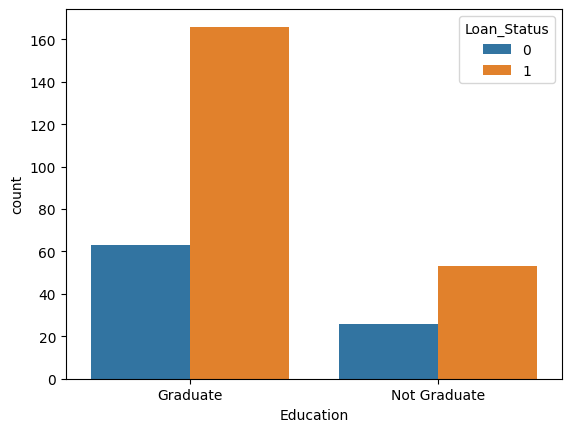

In [13]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

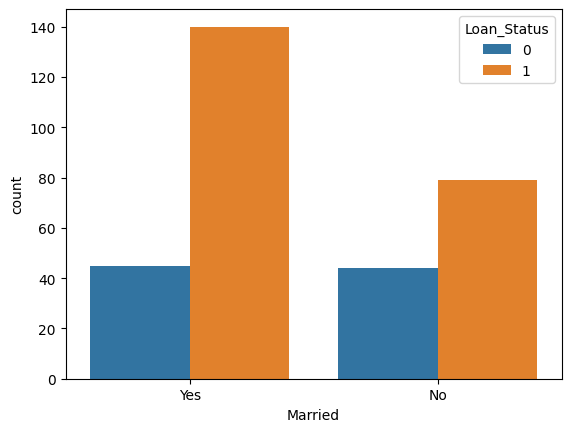

In [14]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [15]:
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

# Explicitly convert the columns
loan_dataset['Married'] = loan_dataset['Married'].astype('int64')  # Or 'category'
loan_dataset['Gender'] = loan_dataset['Gender'].astype('int64')    # Or 'category'
loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].astype('int64') # Or 'category'
loan_dataset['Property_Area'] = loan_dataset['Property_Area'].astype('int64') # Or 'category'
loan_dataset['Education'] = loan_dataset['Education'].astype('int64')  # Or 'category'

# If you want to convert all the columns to category at once:
# cols_to_convert = ['Married', 'Gender', 'Self_Employed', 'Property_Area', 'Education']
# loan_dataset[cols_to_convert] = loan_dataset[cols_to_convert].astype('category')

# Print the data types to verify:
print(loan_dataset.dtypes)

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


C:\Users\Lenovo!\AppData\Local\Temp\ipykernel_19172\860485379.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},


In [16]:
loan_dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
1,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
2,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
3,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
4,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1


In [17]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [18]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1          1          1              0             4583   
1         1        1          0          1              1             3000   
2         1        1          0          0              0             2583   
3         1        0          0          1              0             6000   
4         1        1          0          0              0             2333   
..      ...      ...        ...        ...            ...              ...   
376       1        1          4          1              0             5703   
377       1        1          0          1              0             3232   
378       0        0          0          1              0             2900   
379       1        1          4          1              0             4106   
380       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [19]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(308, 11) (277, 11) (31, 11)


Training the model:

Support Vector Machine Model

In [21]:
classifier = svm.SVC(kernel='linear')

In [22]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [23]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [24]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8267148014440433


In [25]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [26]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8064516129032258
